Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               614600    
                                                                 
 dense_7 (Dense)             (None, 150)               30150     
                                                                 
 dense_8 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(50000, 32, 32, 3)
(500

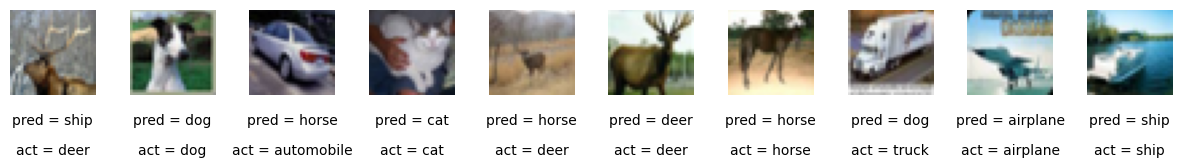

In [3]:
import numpy as np
from keras import datasets, utils, layers, models, optimizers
import tensorflow
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

tensorflow.config.set_visible_devices([], 'GPU')


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

x_train[54, 12, 13, 1]

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation='relu')(x)
x = layers.Dense(units=150, activation='relu')(x)
output_layer = layers.Dense(units=10, activation='softmax')(x)
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

print(x_train.shape)

print(y_train.shape)

opt = optimizers.legacy.Adam(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

model.evaluate(x_test, y_test)

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10
indicies = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indicies):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)